### 数据处理，先查看数据包含的信息，然后对数据进行清洗处理，接着分析数据，得出结论。最后进行总结。

<font color=#0099ff size=4 >阶段一：查看数据信息</font>

## 问题1：数据包含哪些信息？

## 数据基本信息显示

In [1]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
import seaborn as sns

titanic_csv = pd.read_csv('titanic-data.csv')
titanic_csv.info()
print()
print(titanic_csv.head(5))  
print()
print("数据描述")
print(titanic_csv.describe())
print()
print("数据：{}".format(titanic_csv.shape))
print("总体人数：%d" % titanic_csv.shape[0])
survivedNnum = titanic_csv['Survived'].sum()
noSurvivedNnum = titanic_csv.shape[0] - survivedNnum
print( "生还者%d人，未生还%d人。" % (survivedNnum,noSurvivedNnum))
print("数据列：", end="")
for i in range(len(titanic_csv.columns)):
    print("%s\t"%titanic_csv.columns[i], end="")
print()
print("数据缺省值：\n{}".format(titanic_csv.isnull().sum()))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB

   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Bri

## 结论：

总体人数：891。
生还者：342人，未生还549人。
生还率：38% 。

数据包含以下信息：PassengerId: 乘客编号，Survived: 存活情况（存活：1 ; 死亡：0），Pclass: 客舱等级，Name: 乘客姓名，Sex: 性别，Age: 年龄，SibSp: 同乘的兄弟姐妹/配偶数，Parch: 同乘的父母/小孩数，Ticket: 船票编号，Fare: 船票价格，Cabin: 客舱号，Embarked: 登船港口。

由信息描述得知，Age 714 , Cabin 204 ， Embarked 889 等字段有丢失值。

Age缺失177个数值，考虑Age均值方差后再做处理。

Cabin缺失687个数值，缺失严重，考虑去掉Cabin信息。

Embarked缺失2个数值，采用信息补全。

根据已知的数据得出，船上人员大致平均年龄29.7岁，最小 0.42岁，最大80岁。

<font color=#0099ff size=4 >阶段二：数据信息清洗</font>

## 问题2：缺失数据如何处理？

## Cabin信息处理

### 去掉Cabin信息

In [2]:
titanic_csv = titanic_csv.drop('Cabin',axis=1)
print("去掉Cabin信息")
print("数据列：", end="")
for i in range(len(titanic_csv.columns)):
    print("%s\t"%titanic_csv.columns[i], end="")

去掉Cabin信息
数据列：PassengerId	Survived	Pclass	Name	Sex	Age	SibSp	Parch	Ticket	Fare	Embarked	

## Embarked信息处理

In [3]:
EmbarkedM = (titanic_csv.groupby('Embarked').count())['PassengerId']
print(EmbarkedM)
print("C:Q:S = {}:{}:{}".format(EmbarkedM[0],EmbarkedM[1],EmbarkedM[2]))

Embarked
C    168
Q     77
S    644
Name: PassengerId, dtype: int64
C:Q:S = 168:77:644


### Embarked信息的比例
C:Q:S = 168:77:644，Embarked 缺少2个数值，采用众数补全，在Embarked中添加2个“S”数值

In [4]:
titanic_csv.Embarked[titanic_csv.Embarked.isnull()] = ['S']
titanic_csv.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Embarked       891 non-null object
dtypes: float64(2), int64(5), object(4)
memory usage: 76.6+ KB


D:\Program Files\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


## Age信息处理
根据平均值、标准差生成随机值:

In [5]:
# 根据平均值、标准差生成随机值

ageMean = titanic_csv['Age'].mean()
ageStd = titanic_csv['Age'].std()
ageNullNum = titanic_csv['Age'].isnull().sum()
ageRandom = np.random.randint(ageMean - ageStd, ageMean + ageStd, size = ageNullNum)
titanic_csv.Age[titanic_csv.Age.isnull()] = ageRandom

titanic_csv.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            891 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Embarked       891 non-null object
dtypes: float64(2), int64(5), object(4)
memory usage: 76.6+ KB


D:\Program Files\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  import sys


### Age信息处理之后，可视化显示

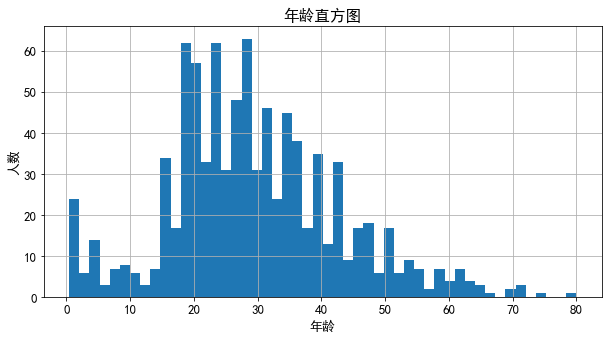

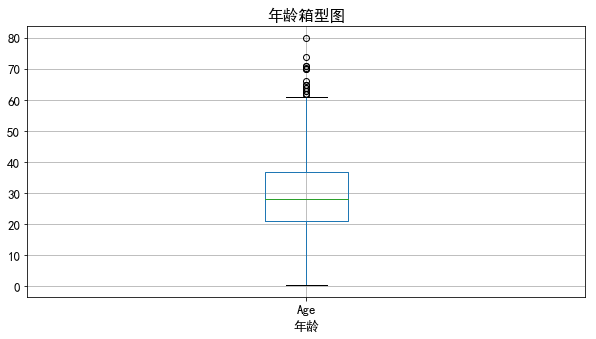

In [6]:
#中文字体显示
plt.rc('font', family='SimHei', size=13)
#
plt.figure(figsize = (10,5))
titanic_csv['Age'].hist(bins = 50)
plt.xlabel('年龄')
plt.ylabel('人数')
plt.title('年龄直方图')
plt.show()

plt.figure(figsize = (10,5))
titanic_csv.boxplot(column='Age', showfliers=True)
plt.xlabel('年龄')
plt.title('年龄箱型图')
plt.show()

## 结论

从直方图可以看出，年龄在0~80岁之间，儿童和老人的人数较少，船上人员20~40岁人为主。

从箱型图看出船上人员年龄常规分布在0~60岁之间，年龄平均在29岁，50%的人员在20~40岁之间，60~80岁之间的人数是极少部分。

<font color=#0099ff size=4 >阶段三：数据分析</font>

依据常识，儿童和女性的幸存率应该最高，男性最低。救援机构可能更愿意救助一等舱的乘客。

### 接下来讨论幸存率的影响因素。探讨幸存率与一个变量因素、两个变量因素之间的相关性。

## 问题3：幸存率是多少？不同等级仓的比率是多少？

### 幸存者数量，幸存率，不同等级仓的人数、比率可视化显示

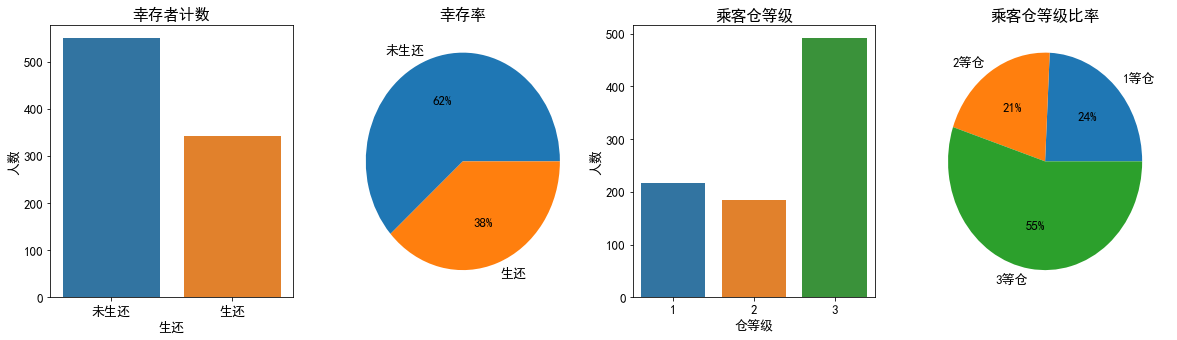

In [7]:
plt.figure(figsize = (20,5))

#幸存者比率
plt.subplot2grid((1,4),(0,0)) 
sns.countplot(x='Survived', data=titanic_csv)
plt.xticks((0,1),('未生还','生还'))
plt.xlabel("生还")
plt.ylabel("人数")
plt.title('幸存者计数')
plt.subplot2grid((1,4),(0,1)) 
plt.pie([noSurvivedNnum, survivedNnum],labels=['未生还','生还'],autopct='%1.0f%%')
plt.title('幸存率') 

#乘客仓等级比率
plt.subplot2grid((1,4),(0,2))  
sns.countplot(x='Pclass', data=titanic_csv)
plt.xlabel("仓等级")
plt.ylabel("人数")
plt.title("乘客仓等级")
plt.subplot2grid((1,4),(0,3)) 
plt.pie(titanic_csv[['Pclass','PassengerId']].groupby(['Pclass']).count(),labels=['1等仓','2等仓','3等仓'],autopct='%1.0f%%')
plt.title('乘客仓等级比率') 

plt.show()

## 结论：

#### 幸存率仅有38%！！

在已知的891人中，只有38%的人生还。说明船只遇险时生还的概率很低！

一等舱和二等舱的人数接近，一等舱占到24%，二等舱占到21%，三等舱的人数超过一半占到55%。

## 问题4：性别和幸存率之间关系如何？

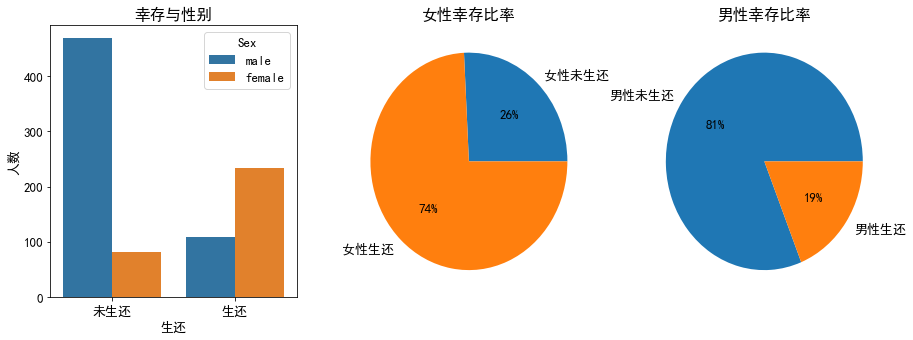

In [8]:
#不同性别的乘客数据对比
plt.figure(figsize = (15,5))
plt.subplot2grid((1,3),(0,0))

sns.countplot(x='Survived',hue="Sex", data=titanic_csv)
plt.xticks((0,1),('未生还','生还'))
plt.xlabel("生还") 
plt.ylabel("人数")
plt.title("幸存与性别")

survivedMale = titanic_csv.Survived[titanic_csv.Sex == 'male'].value_counts()
survivedFemale = titanic_csv.Survived[titanic_csv.Sex == 'female'].value_counts()
sexSurvived=pd.DataFrame({'male':survivedMale, 'female':survivedFemale})
plt.subplot2grid((1,3),(0,1))
plt.pie([sexSurvived['female'][0], sexSurvived['female'][1]],labels=['女性未生还','女性生还'],autopct='%1.0f%%')
plt.title('女性幸存比率') 

plt.subplot2grid((1,3),(0,2))
plt.pie([sexSurvived['male'][0], sexSurvived['male'][1]],labels=['男性未生还','男性生还'],autopct='%1.0f%%')
plt.title('男性幸存比率') 
plt.show()


## 结论：

在船人员中女性幸存率达到74%，男性则只有19%。在女性中，大多数人都可以获救，而男性中绝大多数不能获救。女性获救概率远高于男性获救概率。

这与常识一致，在发生事故时，女性优先。

## 问题4：仓等级和幸存率之间关系如何？

## 仓等级、性别和幸存率之间关系又如何呢？

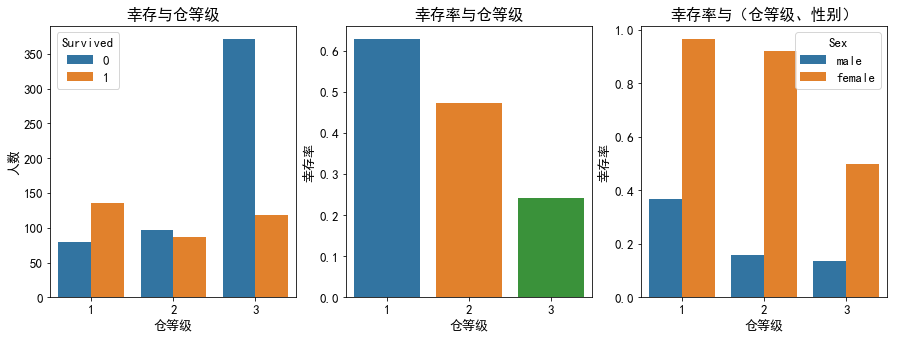

In [9]:
#不同船舱的乘客数据对比
# pclassSurvived = titanic_csv[['Pclass','Survived']]
plt.figure(figsize= (15 ,5))
plt.subplot2grid((1,3),(0,0))
sns.countplot(x='Pclass',hue="Survived", data=titanic_csv)
# pclassSurvived.groupby(['Pclass','Survived'])['Survived'].count().unstack().plot(kind='bar',stacked=True)
plt.xlabel('仓等级')
plt.ylabel('人数') 
plt.title("幸存与仓等级")

plt.subplot2grid((1,3),(0,1))
sns.barplot(data=titanic_csv,x="Pclass",y="Survived",ci=None)
plt.xlabel('仓等级')
plt.ylabel('幸存率')
plt.title("幸存率与仓等级")

plt.subplot2grid((1,3),(0,2))
sns.barplot(data=titanic_csv,x="Pclass",y="Survived",hue="Sex",ci=None)
plt.xlabel('仓等级')
plt.ylabel('幸存率')
plt.title("幸存率与（仓等级、性别）")

plt.show()

## 结论：

从第一张图看出，一、二、三等舱的获救人数接近，在100人左右。一、二等舱的未生还人数接近，但远小于三等舱的未生还人数。

从第二张图看出，一等舱的幸存率最高，三等舱的幸存率最低。救援机构更愿意救助一等舱的。

从第三张图看出，女性在各个仓中的幸存率远高于男性。一等仓女性幸存率超过90%二等舱女性幸存率接近90% 。三等舱的女性幸存率只有50%，低于女性总体74%的幸存率。一等仓男性幸存率接近40% 。二、三等舱男性幸存率约15%，低于男性总体19%的幸存率。

综合分析，一、二等舱的女性幸存率很高，容易获救。一等舱的男性幸存率稍高，相对容易获救。女性在遇险时优先，一等舱更容易获救，符合常识。


## 问题5：年龄和幸存率之间关系如何？

## 仓等级、年龄和幸存率之间关系如何呢？

## 性别、年龄和幸存率之间关系又如何呢？

#### 年龄不分组，保留其数值变量的特性，可视化显示

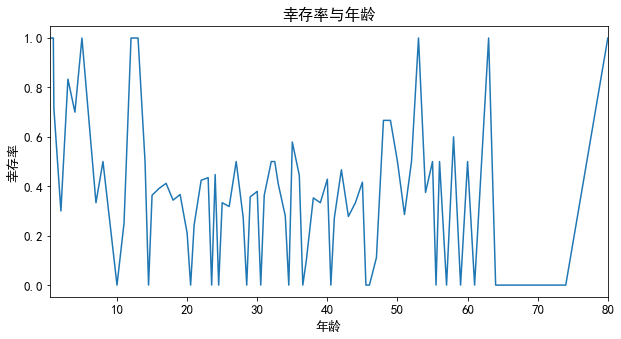

In [10]:
plt.figure(figsize = (10,5))
ageSurvivedRate=(titanic_csv.groupby(['Age']).sum()/titanic_csv.groupby(['Age']).count())['Survived']
ageSurvivedRate.plot()
plt.xlabel('年龄')
plt.ylabel('幸存率')
plt.title('幸存率与年龄')
plt.show()

从图可以看出十岁以下儿童幸存率普遍高于其他年龄的人群。<font color=#ff0000 size=2 >从图中无法得出个体具体年龄和幸存率之间的相关性。</font>

#### 接下来考虑不同年龄段与幸存率之间的相关性。

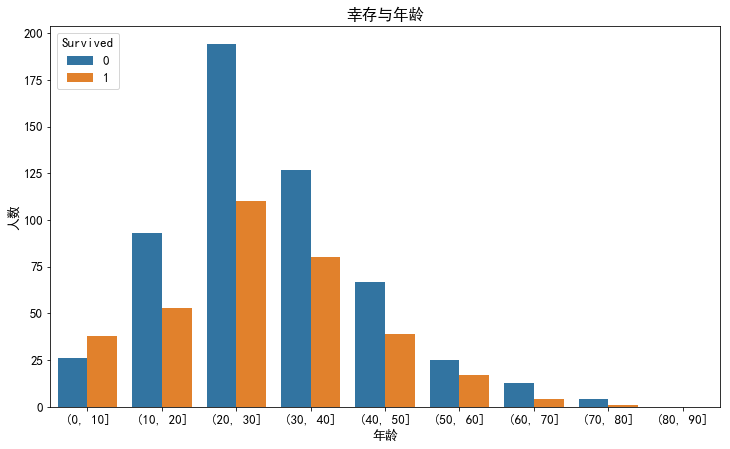

In [11]:
plt.figure(figsize = (12,7))

# 不同年龄段
titanic_csv['i'] = pd.cut(titanic_csv['Age'], np.arange(0,100,10))
sns.countplot(data=titanic_csv,x="i",hue="Survived")
plt.xlabel('年龄')
plt.ylabel('人数')
plt.title('幸存与年龄')

plt.show()

从上图看出，十岁以下儿童生还人数大于十岁以下未生还人数，其他年龄段的生还人数均小于该年龄段的未生还人数。显示20~40岁之间的生还人数最多。
因为总体船上人员20~40岁之间占比稍多于50%，所以20~40岁之间的生还人数最多符合常理。

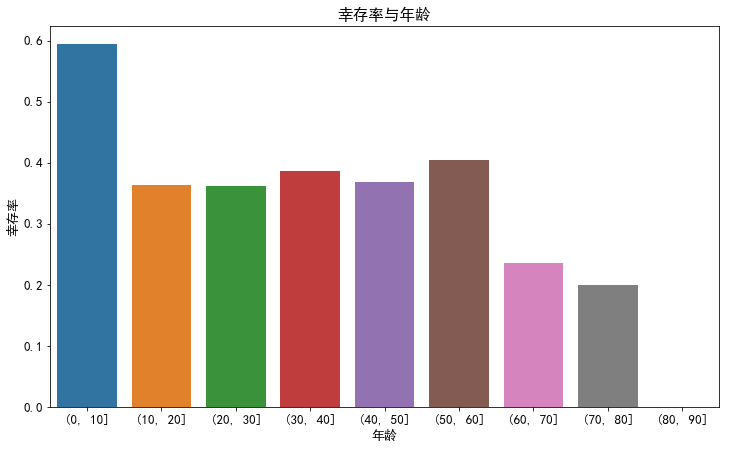

In [12]:
plt.figure(figsize = (12,7))
sns.barplot(data=titanic_csv,x="i",y="Survived",ci=None)
plt.xlabel('年龄')
plt.ylabel('幸存率')
plt.title('幸存率与年龄')
plt.show()

从上图可以看出十岁以下儿童幸存率最高，达到0.6。其他年龄段的幸存率均小于0.5，70~80岁的幸存率最低，仅有0.2。

在遇险时，幼儿容易获救，老人不易获救。

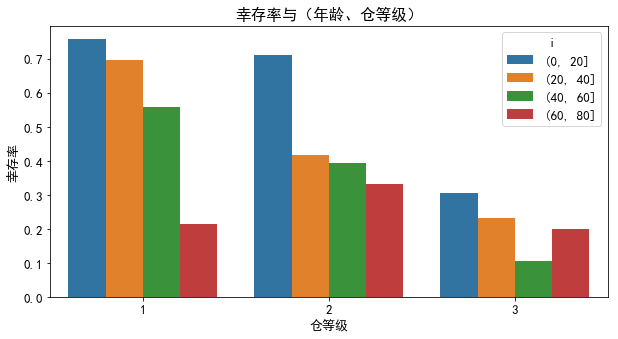

In [13]:
plt.figure(figsize = (10,5))
titanic_csv['i'] = pd.cut(titanic_csv['Age'], np.arange(0,100,20))
sns.barplot(data=titanic_csv,x="Pclass",y="Survived",hue="i",ci=None)
plt.xlabel('仓等级')
plt.ylabel('幸存率')
plt.title('幸存率与（年龄、仓等级）')
plt.show()

从图中看出，20岁以下的幸存率在各个等级仓中均是最高的。在个等级仓中，0~60岁之间，年龄越低幸存率越高。60岁以下的幸存者中，在一等舱中的幸存率最高，接着是二等舱，三等舱的幸存率最低。60~80岁的人数在总体中占比极少（在前面的年龄箱型图中可以看出），在各个等级仓中60~80岁的人的幸存率并不具有0~60岁人群所具有的等级仓规律性。

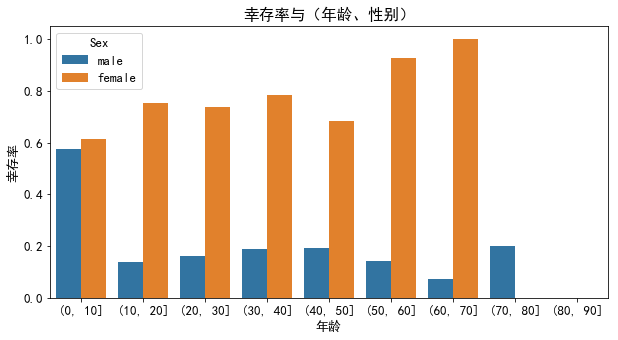

In [14]:
plt.figure(figsize = (10,5))
titanic_csv['i'] = pd.cut(titanic_csv['Age'], np.arange(0,100,10))
sns.barplot(data=titanic_csv,x="i",y="Survived",hue="Sex",ci=None)
plt.xlabel('年龄')
plt.ylabel('幸存率')
plt.title('幸存率与（年龄、性别）')
plt.show()

从图中看出，0~10岁儿童的幸存率与性别无明显关联，男性与女性幸存率均接近0.6。
10~60岁之间，女性的幸存率0.7以上，而男性一般在0.2左右，女性远高于男性。
由于60~80岁的数据不具有普遍性，无法得出性别、年龄与幸存率之间的相关性。

## 结论：

儿童幸存率最高，老人幸存率最低。在各个等级仓中，儿童幸存率最高。成年人中幸存的主要为女性。

## 问题6：登船码头和幸存率之间有怎样的关系？

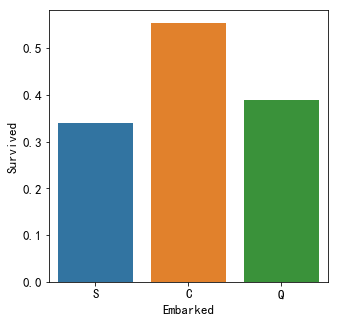

In [15]:
#登船码头与幸存率关系
plt.figure(figsize = (5,5))
sns.barplot(x="Embarked",y="Survived", data=titanic_csv,ci=None)
plt.show()

## 结论：

从C上船的幸存率最高，从S上船的幸存率最低。
#### 但是无法得出登船码头和幸存率之间有直接联系。



# 总结：

本次分析主要探寻泰坦尼克号上的幸存率和各因素（客舱等级、年龄、性别、上船港口等）的关系。在分析中采用了单变量、双变量相关性分析。

船员和乘客的总体891人，幸存率仅有 38% 。男性幸存率19%，女性幸存率74%。女性比男性在这次事故中更容易生还，表明“女士优先”的原则。平均年龄约为 29.7岁， 标准差 15 岁，最小年龄为 0.42 ，最大年龄 80。

一等舱有 216 人，二等舱 184 人，三等舱 491 人，分别占总人数的 24%， 21%， 55%。一等舱乘客的幸存率高于二、三等舱。女性获救的概率高于男性。年龄小于10岁的小孩儿幸存率最高。小孩在救援中得到了很好保护，但是老人容易遇难。

从幸存率来看， C 港上船的幸存率最高， Q 次之， S 幸存率最低。但是无法得出登船码头和幸存率之间有直接联系。

因为对Age变量进行了缺失赋值，可能影响结果误差。可以考虑更加合理的模拟赋值。

#### 目前还无法准确模拟Age的缺失值，可以尝试使用其他相关变量来模拟Age中的缺失值。

泰坦尼克号上共有乘客 2224 人，而本数据集共有 891 人。如果该数据集是从 2224 人中随机选出，分析结果具有代表性。其他单一因素及多因素未做分析。在实际情况中可能存在未在数据中统计的因素，这些因素也可能与幸存率存在相关性。

参考：https://www.jianshu.com/p/3ecf2718b033

http://nbviewer.jupyter.org/github/jmportilla/Udemy-notes/blob/master/Intro%20to%20Data%20Projects%20-%20Titanic.ipynb

http://blog.csdn.net/PatrickZheng/article/details/73843594